In [ ]:
# Lab 4
# Explore the performance of K-Means clustering algorithm on the dataset you have chosen already.
# Check for 6 different clusters and give your interpretation
# Use elbow method to optimize the number of clusters
# Use visualization techniques to present your interpretation

In [ ]:
import pandas as pd
import matplotlib.pyplot as mtp 
import numpy as nm

data = pd.read_csv('student-por.csv')
df = pd.DataFrame(data)

In [ ]:
df.corr()

In [ ]:
df.info

In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df2 = df[['age','studytime','freetime','goout','G1', 'G2', 'G3','higher']].copy()
df2.higher=df2.higher.map(dict(yes=1, no=0))
x = df2.head(100)
x

age  studytime  freetime  goout  G1  G2  G3  higher
0    18          2         3      4   0  11  11       1
1    17          2         3      3   9  11  11       1
2    15          2         3      2  12  13  12       1
3    15          3         2      2  14  14  14       1
4    16          2         3      2  11  13  13       1
..  ...        ...       ...    ...  ..  ..  ..     ...
95   15          4         1      2  13  13  13       1
96   16          1         3      3   9  11  11       1
97   16          2         3      5  13  12  12       1
98   16          1         3      4  12  13  13       1
99   16          3         3      5  12  13  13       1

[100 rows x 8 columns]

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

kmeans = KMeans(3)
kmeans.fit(x)

KMeans(n_clusters=3)

In [ ]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([1, 1, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 2, 2, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 2, 2, 0, 0, 1, 2, 0, 0, 0, 1, 1, 2, 1,
       1, 1, 0, 2, 0, 0, 0, 2, 1, 0, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2,
       0, 1, 1, 2, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 2,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0], dtype=int32)

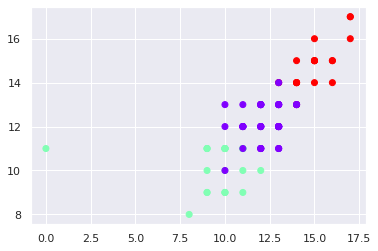

In [ ]:
# ['age','studytime','freetime','goout','G1', 'G2', 'G3','higher']
data_with_clusters = x.copy()
data_with_clusters['Clusters'] = identified_clusters 
data_with_clusters
plt.scatter(data_with_clusters['G1'],data_with_clusters['G2'],c=data_with_clusters['Clusters'],cmap='rainbow')

In [ ]:
wcss=[]
for i in range(1,7):
  kmeans = KMeans(i)
  kmeans.fit(x)
  wcss_iter = kmeans.inertia_
  wcss.append(wcss_iter)

number_clusters = range(1,7)
plt.plot(number_clusters,wcss)
plt.title('The Elbow title')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

Text(0, 0.5, 'WCSS')

In [ ]:
y = df2.head(100)